PCA Transformation : Principal Component Analysis

0.8604149377143467


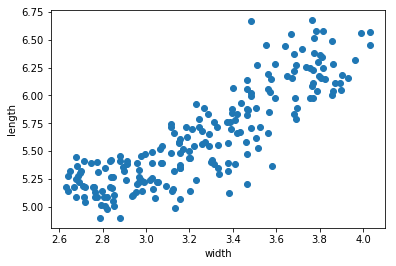

In [3]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

seed = np.genfromtxt('seeds-width-vs-length.csv',delimiter=',',dtype=None)
width = seed[:,0]
length = seed[:,1]
correlation,pValue = pearsonr(width, length)
print(correlation)
plt.plot(width, length, 'o')
plt.xlabel('width')
plt.ylabel('length')
plt.show()

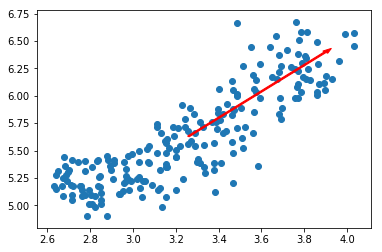

In [4]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(seed)
transformed = pca.transform(seed)
mean = pca.mean_
FPC = pca.components_[0,:]
plt.scatter(width, length)
plt.arrow(mean[0], mean[1], FPC[0], FPC[1], color='red',width=0.01)
#plt.axis('equal')# Keep axes on same scale
plt.show()

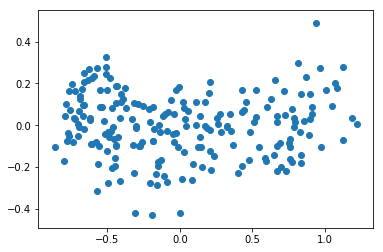

In [5]:
plt.scatter(transformed[:,0],transformed[:,1],)
plt.show()

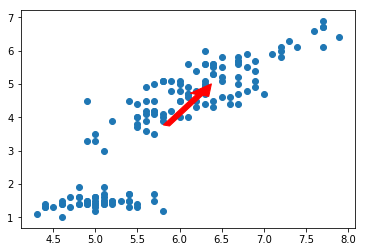

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
iris_model = PCA()
iris_model.fit(iris.data[:,[0,2]])
transform = iris_model.transform(iris.data[:,[0,2]])
mean = iris_model.mean_
First_PC = iris_model.components_[0,:]
First_PC
plt.scatter(iris.data[:,0],iris.data[:,2])
plt.arrow(mean[0], mean[1], First_PC[0], First_PC[1],color='red',width=0.08)
plt.show()

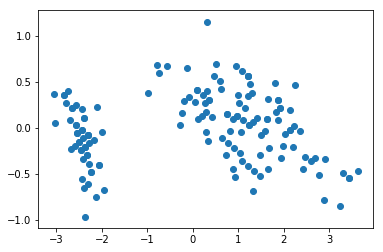

In [8]:
plt.scatter(transform[:,0], transform[:,1])
plt.show()

Intrinsic dimension

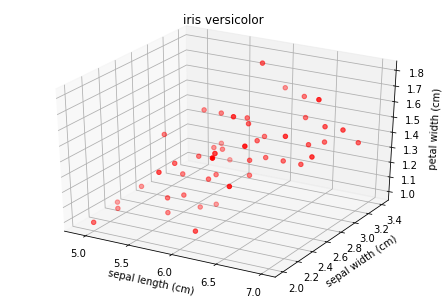

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
versicolor = iris.data[50:100]
versicolor = versicolor[:,[0,1,3]]
ax.scatter(versicolor[:,0], versicolor[:,1], versicolor[:,2],c='r')
ax.set_title('iris versicolor')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal width (cm)')
plt.show()

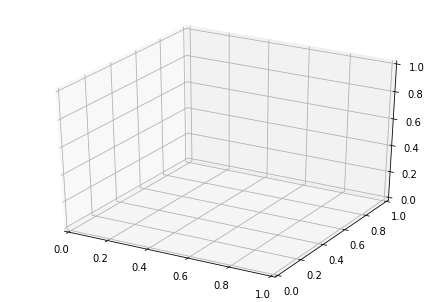

In [10]:
fig2 = plt.figure()
ax2 = Axes3D(fig2)
# Create a PCA instance: pca
VC_pca = PCA()
VC_pca.fit(versicolor)
transformed = VC_pca.transform(versicolor)
# Plot the explained variances
PC = VC_pca.components_
nfeatures = range(VC_pca.n_components_)
#ax2.scatter(transformed[:,0], transformed[:,1], transformed[:,2],c='b')
#ax2.set_title('iris versicolor')
#ax2.set_xlabel('sepal length (cm)')
#ax2.set_ylabel('sepal width (cm)')
#ax2.set_zlabel('petal width (cm)')
#plt.show()

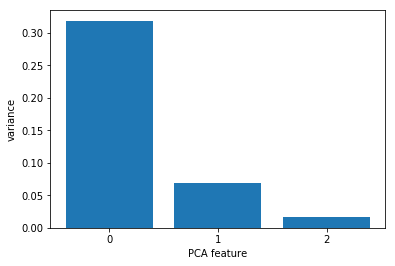

In [11]:
plt.bar(nfeatures, VC_pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(nfeatures)
plt.show()

Dimension reduction

In [12]:
dim_r = PCA(n_components=2)
dim_r.fit(iris.data)
transformed = dim_r.transform(iris.data)

In [13]:
print(transformed.shape)

(150, 2)


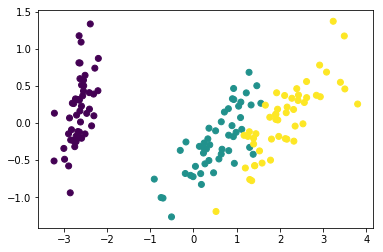

In [14]:
plt.scatter(transformed[:,0], transformed[:,1], c=iris.target)
plt.show()